# 1. Gumbel distribution test

Data from https://www.kaggle.com/code/ivankolt/lrx-4bit-uint64-coset/log?scriptVersionId=221964586

In [1]:
install.packages("goft")
library(goft)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Loading required package: fitdistrplus



Loading required package: MASS



Loading required package: survival



Loading required package: sn



Loading required package: stats4




Attaching package: ‘sn’




The following object is masked from ‘package:stats’:

    sd




In [2]:
gumbel <- function(x, seed = 42) {
    # length(x):1 for mirrored Gumbel
    set.seed(seed)
    x_gen <- sample(length(x):1, 1e5, replace = TRUE, prob = x / sum(x))
    hist(x_gen)
    set.seed(seed)
    ev_test(sample(x_gen, 250))
}

In [3]:
data_source <- list(
  n4 =  c(1, 2, 3),
  n6 =  c(1, 2, 3, 4, 4, 3, 2, 1),
  n8 =  c(1, 2, 3, 4, 6, 8, 7, 9, 10, 9, 8, 2, 1),
  n10 = c(1, 2, 3, 4, 6, 8, 10, 13, 14, 17, 23, 25, 
           26, 25, 23, 21, 16, 11, 4),
  n12 = c(1, 2, 3, 4, 6, 8, 10, 14, 18, 20, 26, 34, 41, 55, 
           55, 68, 69, 68, 81, 72, 71, 62, 46, 45, 27, 14, 4),
  n14 = c(1, 2, 3, 4, 6, 8, 10, 14, 17, 22, 29, 32, 44, 58, 
           70, 90, 104, 120, 143, 155, 171, 193, 201, 210, 215, 
           214, 218, 203, 190, 186, 151, 126, 107, 68, 36, 11),
  n16 = c(1, 2, 3, 4, 6, 8, 10, 14, 17, 21, 29, 35, 42, 56, 
           69, 91, 117, 137, 175, 202, 245, 287, 317, 371, 427, 
           450, 510, 543, 568, 607, 630, 633, 660, 650, 640, 633, 
           607, 577, 537, 475, 432, 361, 278, 226, 114, 47, 6),
  n18 = c(1, 2, 3, 4, 6, 8, 10, 14, 17, 21, 28, 33, 43, 54, 
           65, 85, 108, 136, 173, 212, 258, 319, 381, 452, 532, 
           612, 721, 817, 909, 1037, 1132, 1230, 1369, 1449, 1535, 
           1671, 1724, 1794, 1910, 1933, 1983, 2031, 1999, 2030, 
           2007, 1939, 1935, 1820, 1704, 1651, 1472, 1323, 1203, 
           960, 765, 571, 303, 102, 14),
  n20 = c(1, 2, 3, 4, 6, 8, 10, 14, 17, 21, 28, 32, 41, 53, 
           63, 81, 100, 124, 164, 204, 251, 318, 384, 473, 574, 
           683, 815, 963, 1116, 1308, 1497, 1703, 1950, 2163, 2433, 
           2699, 2932, 3255, 3530, 3779, 4108, 4382, 4640, 4955, 
           5182, 5415, 5673, 5863, 6041, 6198, 6325, 6394, 6472, 
           6511, 6450, 6407, 6313, 6138, 5980, 5744, 5480, 5160, 
           4760, 4402, 3915, 3427, 2969, 2323, 1653, 1103, 412, 
           149, 10),
  n22 = c(1, 2, 3, 4, 6, 8, 10, 14, 17, 21, 28, 32, 40, 51, 
           60, 77, 96, 114, 148, 186, 231, 295, 361, 446, 557, 669, 
           814, 989, 1168, 1395, 1652, 1919, 2242, 2596, 2977, 3411, 
           3859, 4348, 4888, 5439, 6057, 6699, 7303, 8041, 8769, 9422, 
           10283, 11041, 11705, 12666, 13410, 14038, 15042, 15713, 
           16276, 17268, 17804, 18292, 19179, 19511, 19887, 20561, 
           0665, 20924, 21277, 21096, 21191, 21158, 20731, 20642, 
           20144, 19426, 19082, 18141, 17201, 16565, 15196, 13982, 
           12958, 11267, 9831, 8444, 6419, 4588, 2857, 1183, 291, 32),
  n24 = c(1, 2, 3, 4, 6, 8, 10, 14, 17, 21, 28, 32, 40, 50, 58, 
           74, 90, 110, 138, 168, 211, 266, 330, 409, 512, 626, 768, 
           944, 1134, 1374, 1655, 1956, 2339, 2751, 3200, 3781, 4344, 
           5016, 5788, 6553, 7465, 8438, 9478, 10642, 11843, 13129, 
           14606, 15981, 17629, 19327, 20920, 22878, 24829, 26560, 
           28830, 30928, 32805, 35295, 37516, 39430, 42121, 44310, 
           46242, 48918, 51050, 52882, 55476, 57371, 59000, 61240, 
           62903, 64199, 66013, 67266, 68067, 69265, 70069, 70268, 
           70789, 70949, 70418, 70136, 69596, 68368, 67257, 65883, 
           63890, 61841, 59580, 56907, 53936, 50789, 47497, 43501, 
           39457, 35448, 30427, 25662, 20790, 14829, 9041, 5158, 1533, 
           438, 16),
  n26 = c(1, 2, 3, 4, 6, 8, 10, 14, 17, 21, 28, 32, 40, 50, 57, 
          72, 87, 102, 132, 158, 191, 244, 295, 367, 463, 563, 699, 
          860, 1041, 1280, 1550, 1858, 2245, 2679, 3173, 3771, 4428, 
          5186, 6067, 7019, 8112, 9350, 10675, 12165, 13844, 15625, 
          17601, 19794, 22102, 24628, 27415, 30309, 33447, 36884, 40425, 
          44242, 48305, 52531, 57061, 61721, 66695, 71900, 77038, 82794, 
          88604, 94093, 100627, 106900, 112616, 119869, 126379, 132117, 
          139954, 146512, 152136, 160338, 166590, 171871, 180159, 185853, 
          190668, 198668, 203420, 207564, 214869, 218430, 221802, 227887, 
          229887, 232301, 236718, 237043, 238401, 240634, 239054, 239129, 
          238835, 235341, 233921, 230750, 225294, 222197, 216155, 208878, 
          203817, 194765, 185528, 178296, 166559, 155563, 146003, 131755, 
          118725, 106294, 89813, 74722, 59708, 41718, 26056, 13710, 
          4700, 869, 49),
  n28 = c(1, 2, 3, 4, 6, 8, 10, 14, 17, 21, 28, 32, 40, 50, 57, 
           71, 85, 99, 124, 150, 181, 224, 271, 332, 415, 509, 626, 
           781, 941, 1159, 1422, 1709, 2080, 2512, 2985, 3602, 4280, 
           5038, 5998, 6999, 8197, 9601, 11071, 12832, 14820, 16866, 
           19395, 22073, 24917, 28365, 31864, 35749, 40241, 44779, 
           49865, 55592, 61323, 67880, 74923, 82058, 90279, 98756, 
           107510, 117572, 127452, 138045, 150048, 161350, 173958, 
           187906, 200596, 215346, 231171, 245148, 261997, 279625, 
           294738, 313626, 332809, 348769, 369465, 389909, 406379, 
           428633, 449901, 466437, 489810, 511344, 527562, 551492, 
           572614, 588004, 611751, 631811, 645948, 668621, 686872, 
           699132, 719751, 735629, 745452, 763020, 775828, 782521, 
           796139, 805344, 808260, 817026, 821908, 820409, 823672, 
           823798, 817448, 814647, 809351, 797817, 788430, 777389, 
           760339, 744159, 726803, 704524, 681346, 657894, 630152, 
           599718, 569456, 536218, 499171, 462540, 424502, 379970, 
           335846, 291694, 239331, 189623, 141818, 89640, 49287, 24061, 
           5678, 1282, 26),
  n30 = c(1, 2, 3, 4, 6, 8, 10, 14, 17, 21, 28, 32, 40, 50, 57, 
           71, 84, 97, 121, 142, 171, 212, 251, 306, 378, 455, 564, 
           695, 844, 1039, 1269, 1539, 1878, 2269, 2732, 3298, 3941, 
           4707, 5618, 6634, 7836, 9235, 10806, 12642, 14707, 17032, 
           19718, 22677, 26026, 29816, 33947, 38616, 43797, 49467, 
           55780, 62708, 70287, 78596, 87685, 97592, 108261, 119959, 
           132644, 146113, 160912, 176815, 193471, 211832, 231402, 
           251692, 274074, 297707, 322034, 348802, 376921, 405698, 
           437053, 469997, 503536, 539584, 577720, 616265, 656826, 
           700379, 743954, 788749, 838019, 886457, 934902, 989903, 
           1042766, 1094254, 1154935, 1211509, 1265158, 1331099, 1390442, 
           1445400, 1516004, 1576867, 1631988, 1706203, 1767163, 1821414, 
           1897940, 1957276, 2009381, 2086498, 2142463, 2191342, 2267060, 
           2317622, 2361956, 2433902, 2477209, 2515959, 2581564, 2615561, 
           2647396, 2703926, 2727022, 2750973, 2795611, 2806113, 2820893, 
           2851016, 2847876, 2852398, 2865387, 2847380, 2840284, 2834165, 
           2801033, 2781392, 2754577, 2705775, 2672154, 2623736, 2559253, 
           2510419, 2439749, 2359742, 2294963, 2203027, 2108157, 2025985, 
           1912623, 1801641, 1700999, 1568459, 1441957, 1322108, 1170668, 
           1025876, 881949, 713799, 558534, 411214, 262568, 145907, 
           66171, 18776, 2576, 99),
  n32 = c(1, 2, 3, 4, 6, 8, 10, 14, 17, 21, 28, 32, 40, 50, 57, 
           71, 84, 96, 119, 139, 163, 202, 237, 286, 352, 416, 510, 
           627, 754, 929, 1137, 1368, 1682, 2033, 2450, 2977, 3575, 
           4276, 5143, 6115, 7267, 8628, 10169, 11970, 14079, 16428, 
           19149, 22301, 25763, 29794, 34325, 39308, 45070, 51431, 
           58446, 66464, 75231, 84816, 95832, 107460, 120514, 135100, 
           150416, 167703, 186728, 206503, 229138, 253298, 278662, 
           307534, 337906, 369803, 406155, 443544, 483376, 528131, 
           573746, 622642, 676993, 731677, 791285, 855856, 920991, 
           992498, 1068179, 1144680, 1229650, 1316535, 1405986, 1505286, 
           1603810, 1707056, 1821759, 1931535, 2050034, 2180244, 2301260, 
           2435389, 2581447, 2712824, 2863357, 3024633, 3165715, 3332154, 
           3508166, 3657236, 3839490, 4028635, 4184120, 4380677, 4581395, 
           4740750, 4950565, 5159913, 5320806, 5541082, 5756185, 5915605, 
           6143865, 6360669, 6515729, 6747734, 6962244, 7109574, 7341283, 
           7548547, 7684905, 7910471, 8106078, 8227843, 8442014, 8620748, 
           8724201, 8920094, 9077597, 9158952, 9330779, 9461988, 9517271, 
           9658086, 9758832, 9784170, 9888432, 9954283, 9946052, 10007876, 
           10035224, 9990193, 10005281, 9990251, 9905398, 9868939, 
           9808285, 9681604, 9591148, 9482824, 9312474, 9166056, 9007348, 
           8793098, 8588503, 8378095, 8118183, 7855764, 7591702, 7288884, 
           6968422, 6652560, 6305029, 5924307, 5552017, 5156615, 4721298, 
           4293797, 3855440, 3356201, 2864582, 2380066, 1846348, 1366121, 
           949055, 539109, 267330, 111456, 20981, 3721, 42),
  n34 = c(1, 2, 3, 4, 6, 8, 10, 14, 17, 21, 28, 32, 40, 50, 57, 
           71, 84, 96, 118, 137, 160, 194, 227, 270, 330, 390, 469, 
           571, 682, 833, 1017, 1221, 1493, 1811, 2176, 2649, 3189, 
           3824, 4614, 5506, 6566, 7848, 9286, 10997, 13012, 15260, 
           17938, 21013, 24439, 28499, 33051, 38163, 44117, 50691, 
           58131, 66603, 75919, 86485, 98292, 111265, 125942, 142013, 
           159756, 179697, 201222, 225097, 251601, 280017, 311604, 
           346204, 383273, 424351, 468820, 516548, 569041, 625434, 
           686155, 752221, 822856, 899042, 980990, 1068494, 1162908, 
           1263223, 1370349, 1485891, 1607253, 1736978, 1876688, 2021801, 
           2177137, 2344197, 2515897, 2699832, 2897364, 3098419, 3313788, 
           3544900, 3778066, 4027394, 4295044, 4562844, 4848103, 5155146, 
           5459943, 5782444, 6131382, 6474952, 6835258, 7228470, 7611993, 
           8009594, 8448793, 8872604, 9306260, 9792785, 10256128, 
           10723324, 11257537, 11758553, 12256004, 12837467, 13372909, 
           13896091, 14522981, 15088266, 15632042, 16301337, 16890289, 
           17448217, 18155124, 18760406, 19325787, 20063966, 20676401, 
           21241217, 22002311, 22611934, 23168215, 23942127, 24537382, 
           25076086, 25850818, 26419731, 26932029, 27693861, 28223218, 
           28699425, 29433104, 29909978, 30340880, 31029669, 31440275, 
           31816014, 32442493, 32774351, 33085709, 33631660, 33872095, 
           34109473, 34556972, 34695075, 34849422, 35180520, 35205584, 
           35267308, 35465715, 35370128, 35331292, 35381994, 35158405, 
           35010299, 34900975, 34545155, 34279972, 33999590, 33507064, 
           33116860, 32659266, 32029885, 31509183, 30871147, 30103860, 
           29445394, 28626490, 27720303, 26916653, 25916791, 24873831, 
           23923419, 22752578, 21575282, 20466999, 19121418, 17796013, 
           16520089, 15012272, 13537961, 12090934, 10427006, 8812388, 
           7234323, 5574221, 4097382, 2794926, 1640276, 816178, 319532, 
           75063, 7700, 165),
  n36 = c(1, 2, 3, 4, 6, 8, 10, 14, 17, 21, 28, 32, 40, 50, 57, 
           71, 84, 96, 118, 136, 158, 191, 219, 260, 314, 366, 443, 
           530, 624, 761, 917, 1099, 1338, 1613, 1942, 2359, 2833, 
           3412, 4111, 4917, 5889, 7043, 8373, 9959, 11808, 13954, 
           16453, 19360, 22698, 26541, 30998, 36044, 41845, 48472, 
           55947, 64450, 74111, 84861, 97125, 110864, 126064, 143391, 
           162501, 183706, 207580, 233838, 262790, 295242, 330589, 
           369585, 412896, 459904, 511560, 568661, 630053, 697880, 
           771778, 851200, 938903, 1033370, 1134883, 1246980, 1365956, 
           1494650, 1635771, 1784259, 1945455, 2121092, 2304384, 2504444, 
           2720170, 2944635, 3189965, 3452375, 3724671, 4022596, 4338163, 
           4665995, 5023720, 5399844, 5791123, 6216453, 6660346, 7123989, 
           7624154, 8143578, 8688771, 9270996, 9873487, 10510124, 
           11180287, 11874169, 12611880, 13375182, 14168293, 15016684, 
           15876639, 16777575, 17745095, 18704072, 19720556, 20814685, 
           21873299, 23012948, 24239395, 25396705, 26665704, 28028243, 
           29281357, 30684928, 32184842, 33528988, 35069810, 36706140, 
           38134437, 39813556, 41582017, 43085124, 44900142, 46793726, 
           48360161, 50306174, 52314230, 53929737, 55998025, 58106558, 
           59754777, 61933371, 64124235, 65786353, 68058932, 70310846, 
           71966412, 74312855, 76600209, 78226537, 80621987, 82916645, 
           84489908, 86905553, 89175646, 90670339, 93072861, 95284803, 
           96674672, 99027072, 101144600, 102402470, 104664006, 106651065, 
           107749207, 109876934, 111695289, 112605500, 114554101, 
           116167321, 116861411, 118584990, 119955255, 120405694, 
           121858853, 122952188, 123132429, 124270192, 125052512, 
           124936954, 125718580, 126159250, 125724691, 126110537, 
           126179556, 125404194, 125361004, 125034872, 123902005, 
           123401103, 122656161, 121151482, 120170526, 118990155, 
           117102738, 115620087, 113984324, 111706659, 109713331, 
           107621364, 104949201, 102443351, 99877884, 96814491, 93781283, 
           90744126, 87274279, 83725779, 80199754, 76343554, 72277511, 
           68279599, 64018142, 59401093, 54878199, 50152774, 45041603, 
           40018473, 34962519, 29411892, 24103246, 19139872, 14025948, 
           9757842, 6298778, 3234378, 1438790, 513097, 77520, 10768, 68),
  n38 = c(1, 2, 3, 4, 6, 8, 10, 14, 17, 21, 28, 32, 40, 50, 57, 
           71, 84, 96, 118, 136, 157, 189, 216, 252, 304, 350, 417, 
           502, 583, 701, 843, 995, 1210, 1450, 1730, 2106, 2521, 
           3022, 3657, 4362, 5221, 6272, 7455, 8884, 10582, 12510, 
           14822, 17515, 20582, 24213, 28378, 33121, 38701, 45015, 
           52197, 60559, 69895, 80539, 92794, 106335, 121788, 139350, 
           158637, 180660, 205331, 232419, 263201, 297268, 334747, 
           377020, 423368, 474492, 531550, 593780, 662528, 738448, 
           820963, 912202, 1011881, 1120019, 1239505, 1368768, 1509012, 
           1663581, 1829279, 2009259, 2206770, 2417093, 2645755, 2895213, 
           3159678, 3447279, 3758945, 4088670, 4446753, 4832288, 5240024, 
           5681456, 6153930, 6654087, 7193034, 7767083, 8375731, 9027647, 
           9719485, 10454383, 11235910, 12063085, 12943481, 13872569, 
           14854062, 15900702, 16996137, 18151997, 19387045, 20668675, 
           22019737, 23466286, 24954367, 26522081, 28204347, 29919645, 
           31725360, 33667781, 35630962, 37695643, 39923112, 42154685, 
           44497977, 47034794, 49554220, 52194103, 55064237, 57889801, 
           60841284, 64067150, 67215067, 70490256, 74092962, 77576662, 
           81183021, 85180856, 89010268, 92951028, 97359813, 101540419, 
           105812899, 110644100, 115176073, 119772382, 125033373, 
           129910758, 134816054, 140508084, 145718153, 150911985, 
           157030363, 162552377, 168006639, 174538590, 180344206, 
           186025349, 192950260, 199001911, 204868611, 212156005, 
           218407932, 224413713, 232023531, 238420327, 244511397, 
           252392515, 258870964, 264989356, 273079842, 279567181, 
           285648200, 293874556, 300291856, 306268109, 314545994, 
           320805960, 326604230, 334838169, 340849350, 346395192, 
           354479820, 360144580, 365359041, 373179897, 378399527, 
           383203783, 390638571, 395311153, 399623735, 406544960, 
           410571288, 414312438, 420588185, 423868893, 426957449, 
           432454731, 434896616, 437254322, 441839835, 443352686, 
           444902070, 448448487, 448953384, 449621248, 452006037, 
           451429555, 451145391, 452257737, 450538812, 449236142, 
           448973784, 446056820, 443670269, 441948605, 437797209, 
           434276014, 431027344, 425610064, 420901081, 416075836, 
           409376491, 403434002, 396992087, 388991700, 381770732, 
           373703641, 364410530, 355887234, 346205737, 335619340, 
           325750380, 314466130, 302566264, 291296689, 278407887, 
           265205961, 252534962, 238113934, 223603525, 209415213, 
           193370914, 177390339, 161612977, 144130332, 126927024, 
           110030240, 91960721, 74781052, 58642822, 43035578, 29804279, 
           18913025, 10211679, 4551194, 1542499, 301403, 23122, 314),
  n40 = c(1, 2, 3, 4, 6, 8, 10, 14, 17, 21, 28, 32, 40, 50, 57, 
           71, 84, 96, 118, 136, 157, 188, 214, 249, 296, 340, 401, 
           476, 553, 660, 783, 919, 1106, 1318, 1565, 1886, 2258, 
           2695, 3249, 3880, 4634, 5562, 6623, 7892, 9420, 11154, 
           13236, 15692, 18484, 21813, 25663, 30056, 35232, 41164, 
           47925, 55824, 64740, 74957, 86684, 99929, 115002, 132100, 
           151344, 173159, 197656, 225159, 256199, 290657, 329480, 372670, 
          420741, 474422, 533896, 599769, 673094, 753609, 843101, 941465, 
          1049618, 1169116, 1299949, 1443130, 1601257, 1772744, 1960798, 
          2167068, 2390072, 2633934, 2900703, 3187135, 3501047, 3841621, 
          4207042, 4606438, 5037725, 5499169, 6003398, 6543587, 7122767, 
          7752360, 8424173, 9144456, 9924416, 10752492, 11642490, 12599017, 
          13613595, 14703538, 15868276, 17101633, 18427119, 19833281, 21323913, 
          22921948, 24609181, 26397063, 28310648, 30320342, 32451711, 34724862, 
          37105290, 39627108, 42310339, 45111205, 48076437, 51220483, 54498704, 
          57959937, 61621724, 65435261, 69449917, 73685671, 78099699, 82722665, 
          87594330, 92674136, 97963288, 103530687, 109348442, 115356013, 
          121684465, 128310498, 135088972, 142240312, 149750090, 157342848, 
          165383716, 173847949, 182295748, 191287755, 200778966, 210110228, 
          220118519, 230700208, 240938414, 252020253, 263753749, 274907452, 
          287121292, 300053931, 312124603, 325516824, 339689615, 352661815, 
          367276390, 382711723, 396560985, 412425114, 429134833, 443817928, 
          460951922, 478925184, 494388338, 512790449, 532002378, 548171509, 
          567829116, 588228417, 605017569, 625890683, 647409343, 664711652, 
          686745878, 709286626, 726982653, 750091991, 773538764, 791488720, 
          815569842, 839775998, 857828472, 882743382, 907542927, 925527901, 
          951119100, 976315877, 994053054, 1020126749, 1045506918, 1062800580, 
          1089143735, 1114465652, 1131112393, 1157475402, 1182482985, 
          1198267707, 1224384565, 1248800091, 1263503526, 1289074389, 
          1312610592, 1326006293, 1350719466, 1373074859, 1384933977, 
          1408451240, 1429321029, 1439414060, 1461391961, 1480465098, 
          1488562947, 1508641473, 1525611315, 1531491255, 1549315630, 
          1563880508, 1567323621, 1582534931, 1594400877, 1595200189, 
          1607454344, 1616341654, 1614297559, 1623257664, 1628897632, 
          1623831338, 1629192396, 1631345982, 1623094937, 1624561925, 
          1623008330, 1611427011, 1608758466, 1603299420, 1588267709, 
          1581226286, 1571686859, 1553096922, 1541509561, 1527758337, 
          1505547414, 1489268192, 1471190309, 1445304288, 1424240496, 
          1401758689, 1372165266, 1346204623, 1319212864, 1285885317, 
          1255018843, 1223572833, 1186503005, 1150771372, 1114733507, 
          1073964400, 1033214564, 992615093, 947948224, 902287965, 
          856919395, 808493991, 757831401, 707783138, 655398079, 599351218, 
          544314453, 487876996, 428251969, 370442952, 314131447, 254912600, 
          200718353, 152529976, 105826736, 69335732, 41561548, 19314405, 
          7703420, 2352934, 285964, 31088, 110),
    n42 = c(1, 2, 3, 4, 6, 8, 10, 14, 17, 21, 28, 32, 40, 50, 57, 71, 84, 96, 118, 
  136, 157, 188, 213, 247, 293, 332, 391, 460, 527, 628, 740, 859, 1028, 
  1212, 1429, 1717, 2032, 2420, 2908, 3451, 4124, 4937, 5863, 7000, 8341, 
  9884, 11749, 13928, 16449, 19445, 22924, 26929, 31634, 37084, 43314, 50581, 
  58923, 68415, 79425, 91948, 106151, 122545, 140984, 161838, 185757, 212441, 
  242610, 276867, 314905, 357850, 406160, 459619, 519866, 586961, 661113, 
  744417, 836347, 937945, 1051568, 1175996, 1313564, 1466511, 1633135, 1817332, 
  2020763, 2241634, 2485510, 2753106, 3043221, 3362695, 3711141, 4088676, 
  4502938, 4952514, 5439594, 5971581, 6546496, 7169494, 7846533, 8575798, 
  9366113, 10220338, 11138116, 12132575, 13201715, 14348336, 15589898, 16917632, 
  18339946, 19878192, 21515394, 23267755, 25159276, 27164134, 29308691, 31617871, 
  34057489, 36664936, 39464010, 42414460, 45564255, 48934420, 52482086, 56262655, 
  60293918, 64535611, 69044837, 73837043, 78880890, 84225908, 89888332, 95853657, 
  102151149, 108803274, 115821359, 123197026, 130967495, 139180999, 147769746, 
  156796957, 166360263, 176304918, 186735281, 197813817, 209265191, 221253216, 
  234022784, 247137559, 260843565, 275489589, 290430327, 306019620, 322735439, 
  339667607, 357307641, 376293487, 395385079, 415243748, 436704036, 458122003, 
  480364240, 504506256, 528415530, 553200250, 580230203, 606789519, 634266197, 
  664387915, 693748021, 724052390, 757462385, 789761267, 823011901, 859897545, 
  895257766, 931551093, 972084790, 1010608319, 1050015654, 1094352836, 
  1136117489, 1178679339, 1226951343, 1272005519, 1317729910, 1370041985, 
  1418400348, 1467256476, 1523679699, 1575318450, 1627236680, 1687805510, 
  1742657483, 1797523096, 1862227179, 1920178464, 1977833164, 2046614545,
  2107499114, 2167734941, 2240479962, 2304078344, 2366641507, 2443178593, 
  2509212695, 2573797567, 2653889564, 2722023420, 2788278428, 2871621084, 
  2941456576, 3008978916, 3095195019, 3166275415, 3234618856, 3323257702, 
  3395063836, 3463733841, 3554267668, 3626226169, 3694691034, 3786516535, 
  3857995644, 3925679855, 4018117242, 4088439216, 4154737785, 4247034431, 
  4315472188, 4379744558, 4471078376, 4536871905, 4598456884, 4687940703, 
  4750292908, 4808503225, 4895194345, 4953294423, 5007434798, 5090341736, 
  5143359097, 5192717343, 5270810964, 5317919283, 5361787255, 5434012025, 
  5474385174, 5512049134, 5577337079, 5610174529, 5640935127, 5698217005, 
  5722741124, 5745910914, 5794141624, 5809622435, 5824538387, 5862698809, 
  5868446447, 5874467416, 5901591150, 5896978801, 5893497157, 5908669804, 
  5893123865, 5879569537, 5881973619, 5855013912, 5830862506, 5819760335, 
  5780969307, 5745747786, 5720523741, 5669565763, 5622834353, 5582953214, 
  5519540840, 5460888627, 5405957636, 5329934977, 5259085966, 5188852763, 
  5100100568, 5016750510, 4931059055, 4829530007, 4733427024, 4632150321, 
  4517739591, 4408610329, 4291823068, 4164621650, 4042370140, 3910256508, 
  3770238274, 3634507234, 3487082328, 3333866515, 3184063815, 3021061439, 
  2854596461, 2690692246, 2512619523, 2332812220, 2154026887, 1960678424, 
  1767886068, 1577285948, 1376202079, 1180906947, 992886559, 803471316, 
  629081091, 472092765, 330303702, 215866910, 127589842, 63341878, 25322911, 
  7459372, 1215355, 69654, 545
  )
)

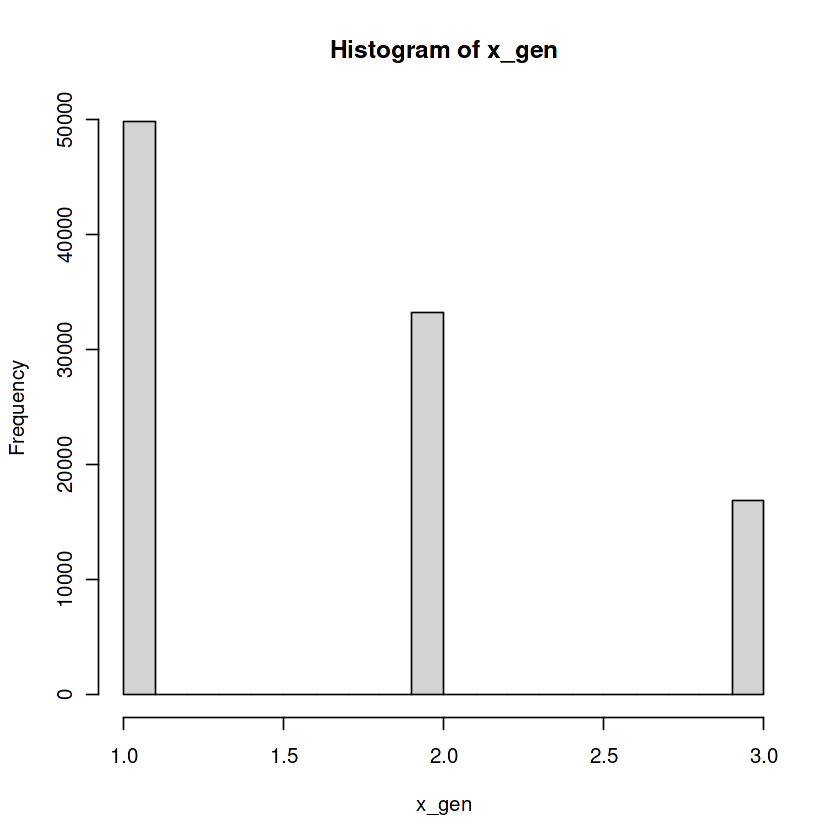

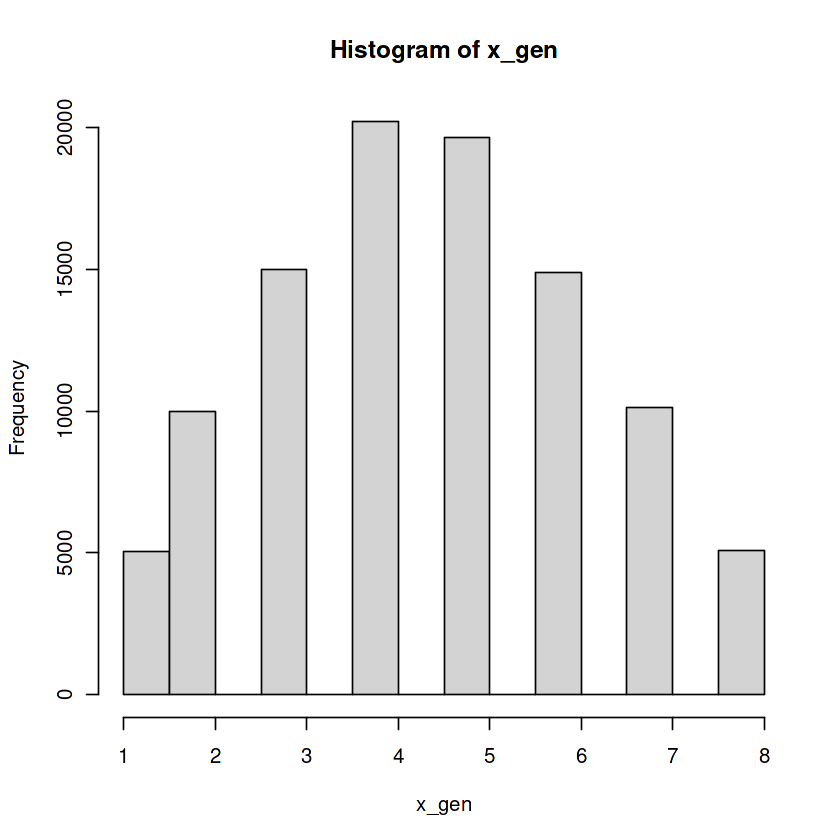

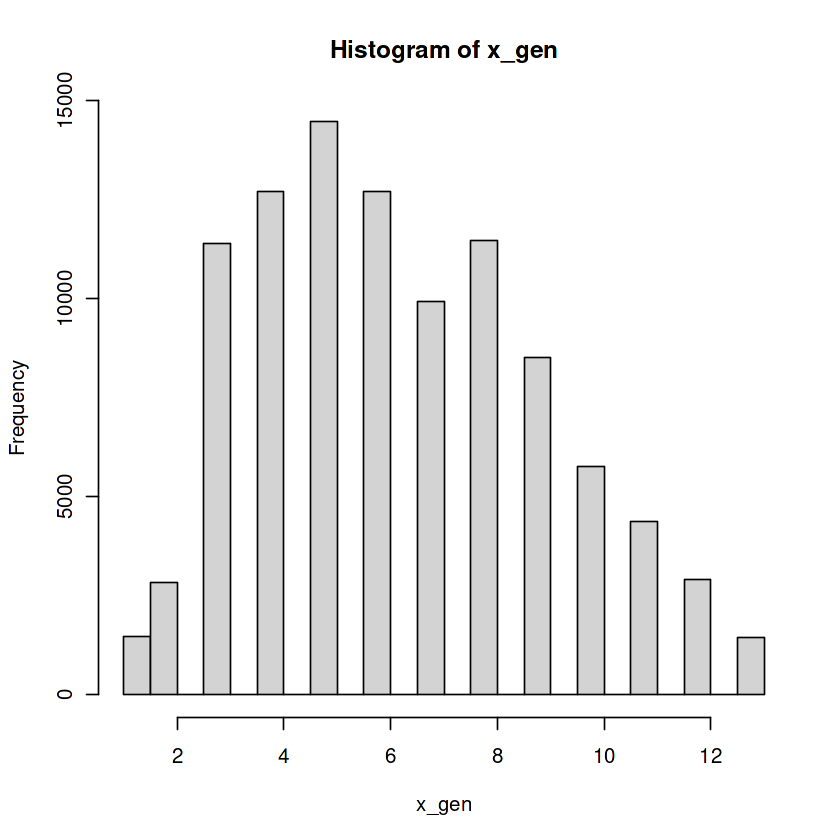

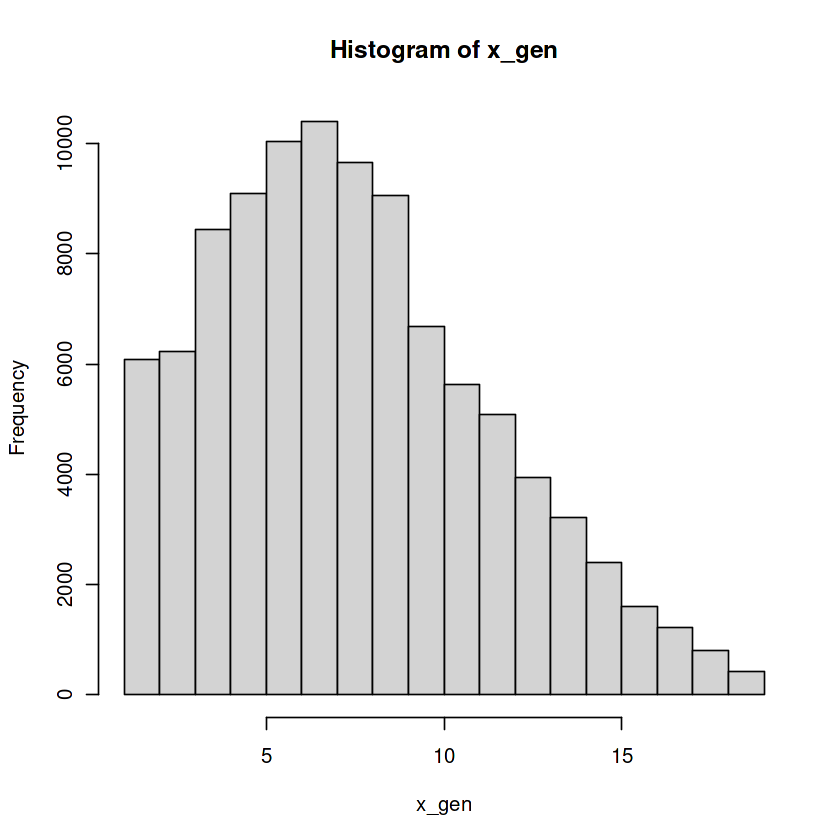

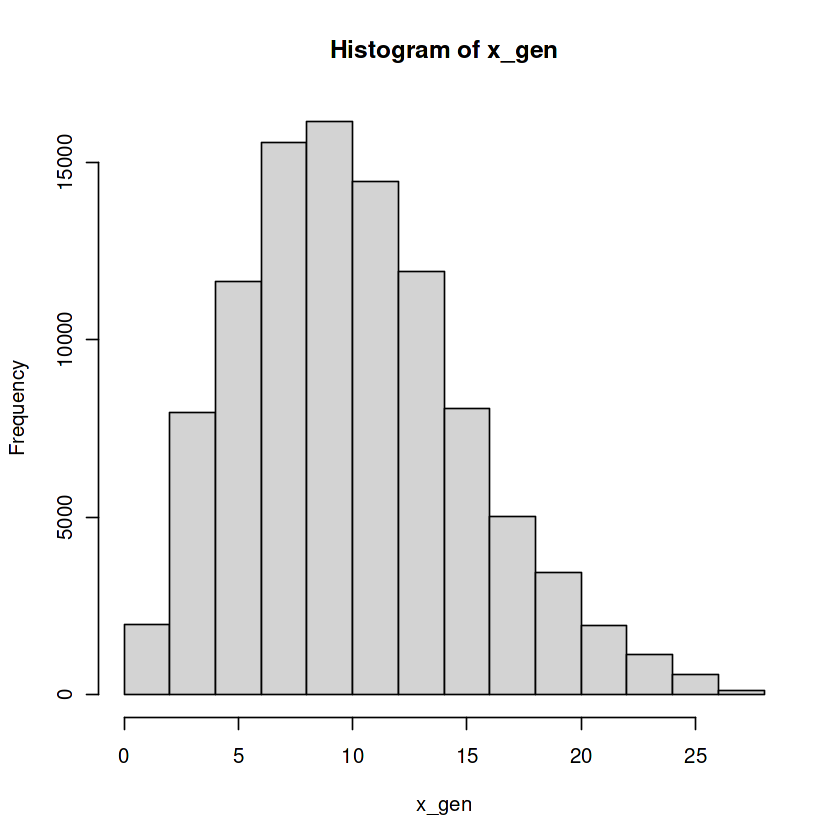

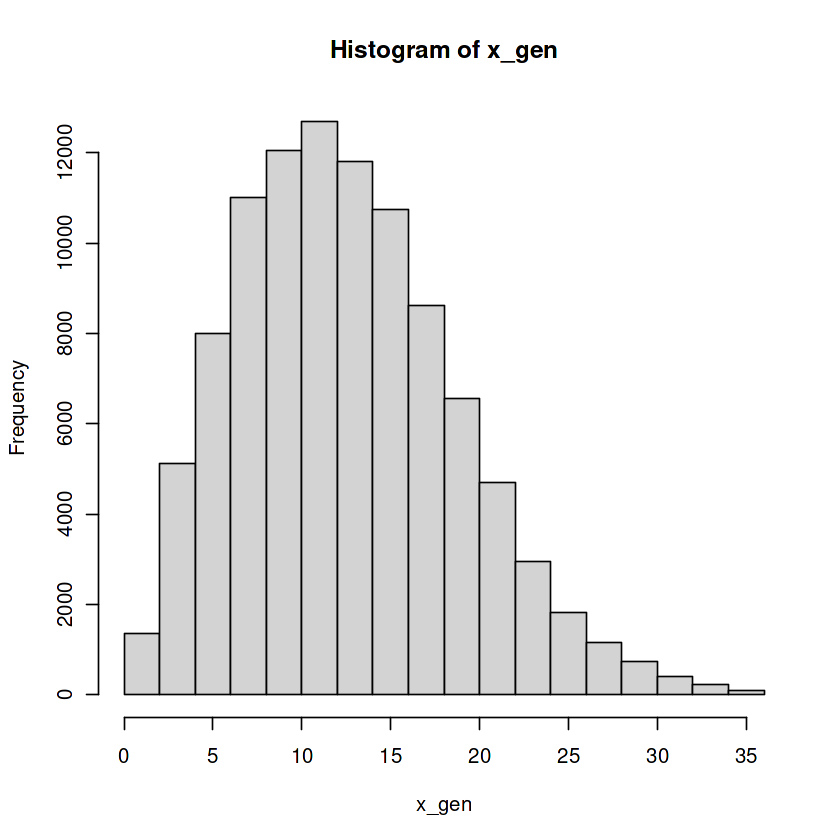

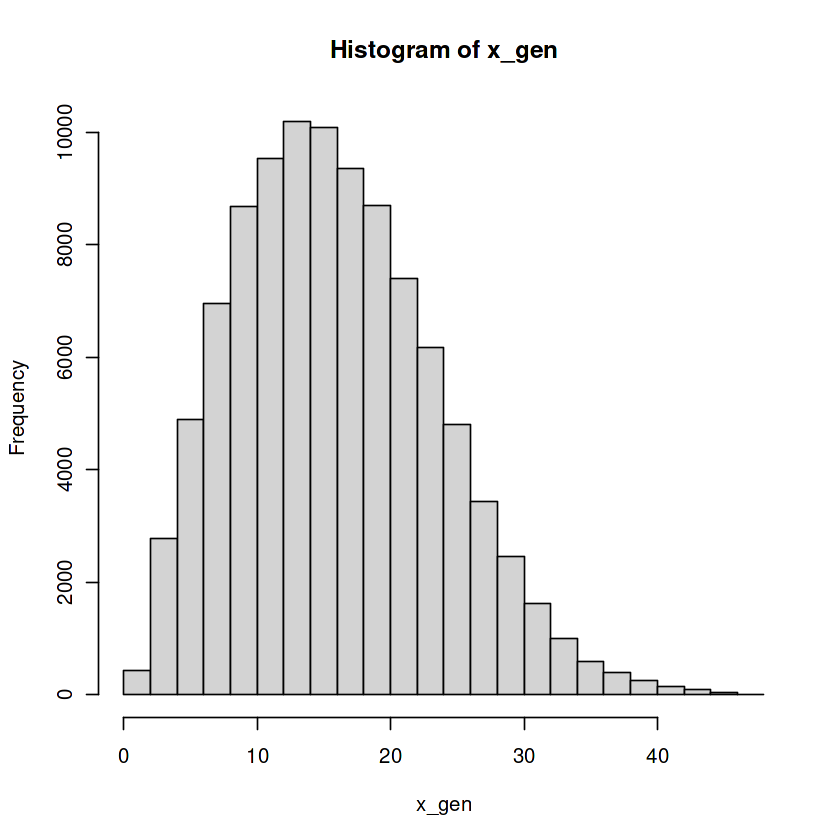

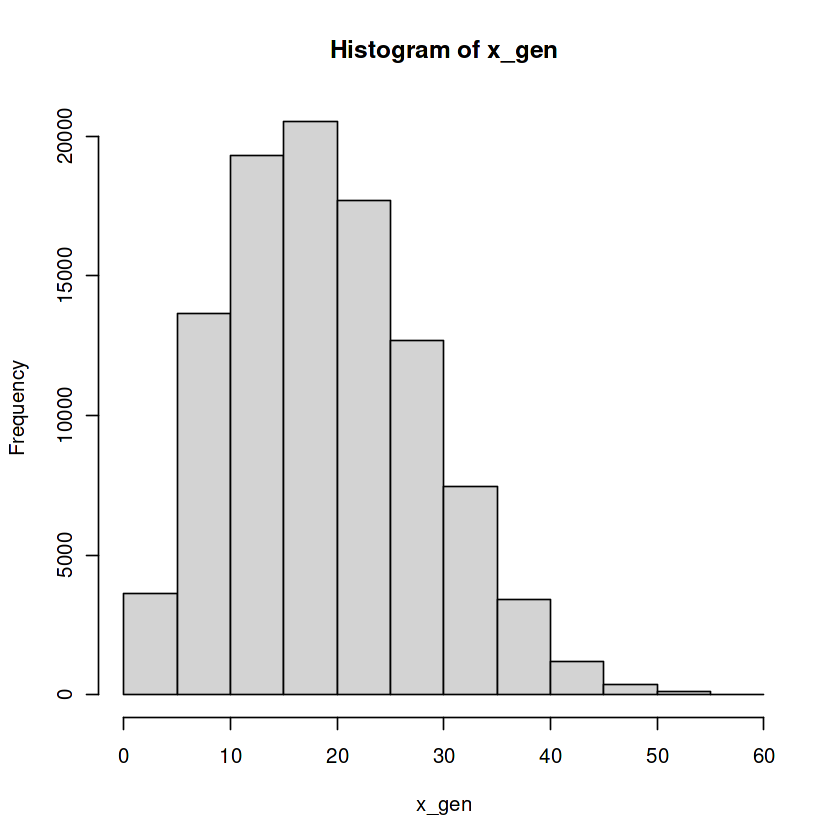

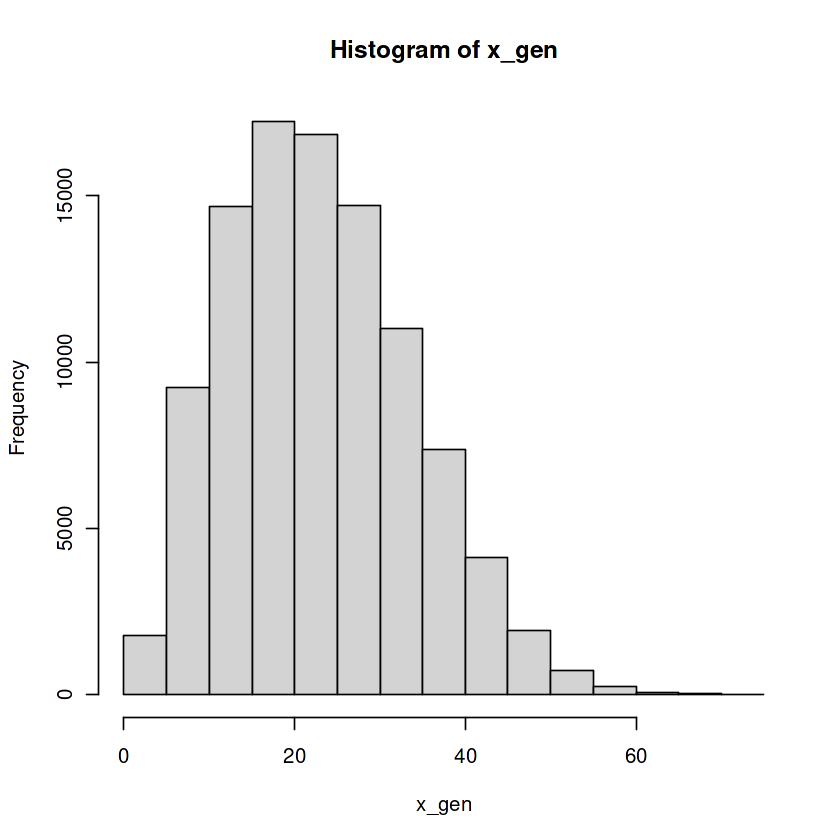

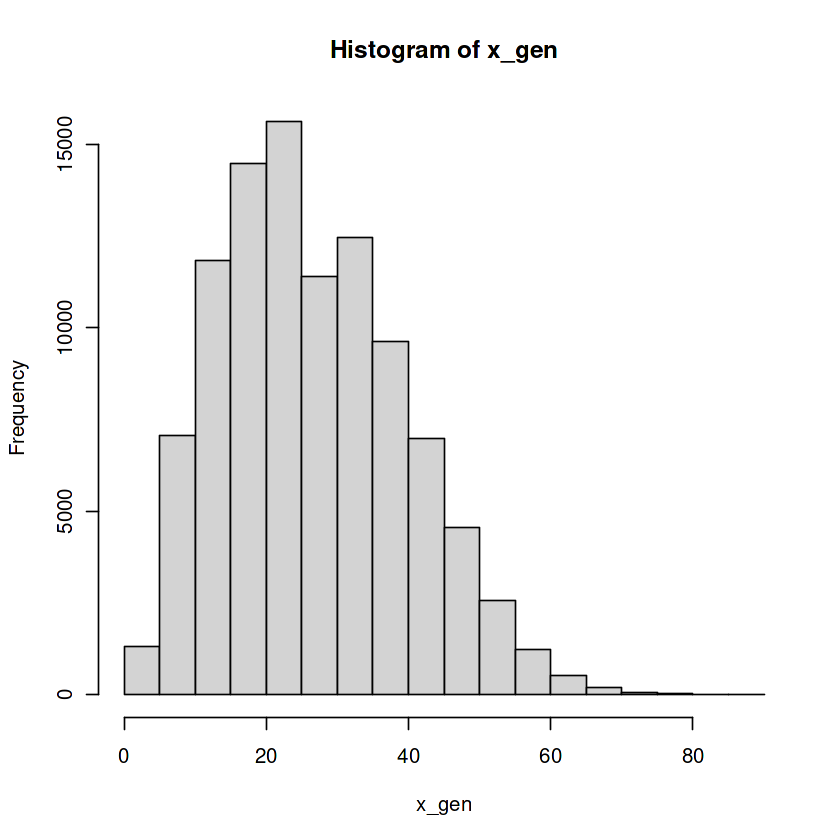

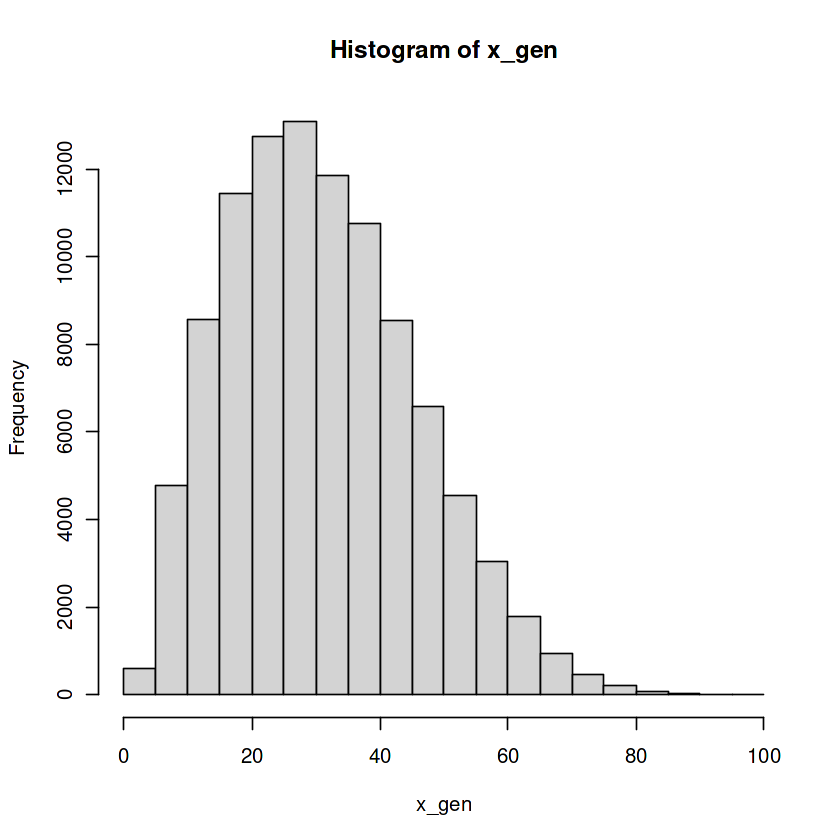

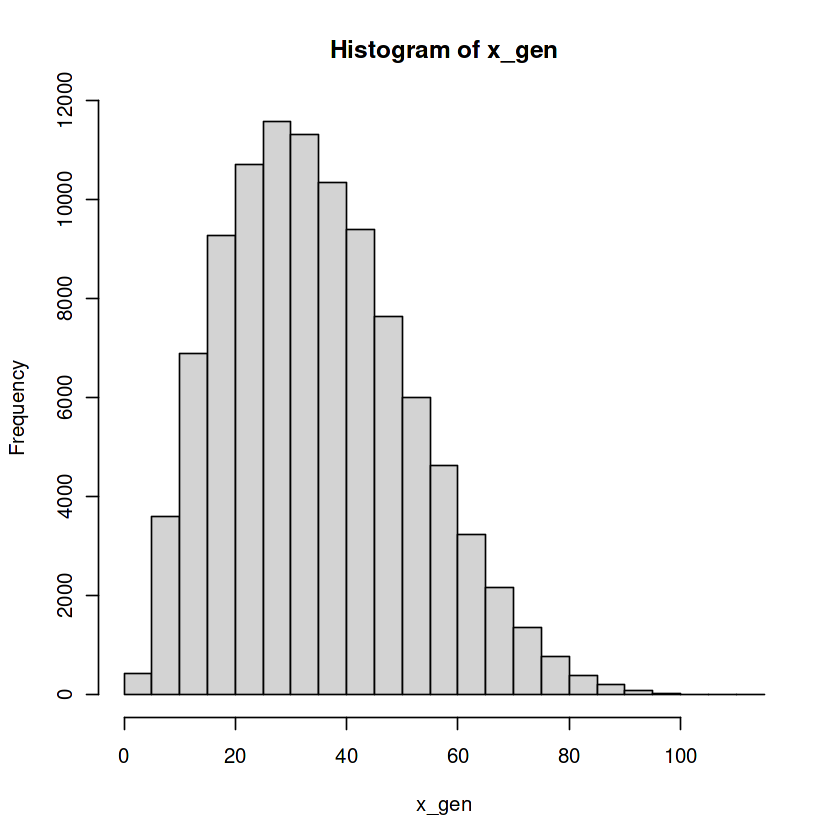

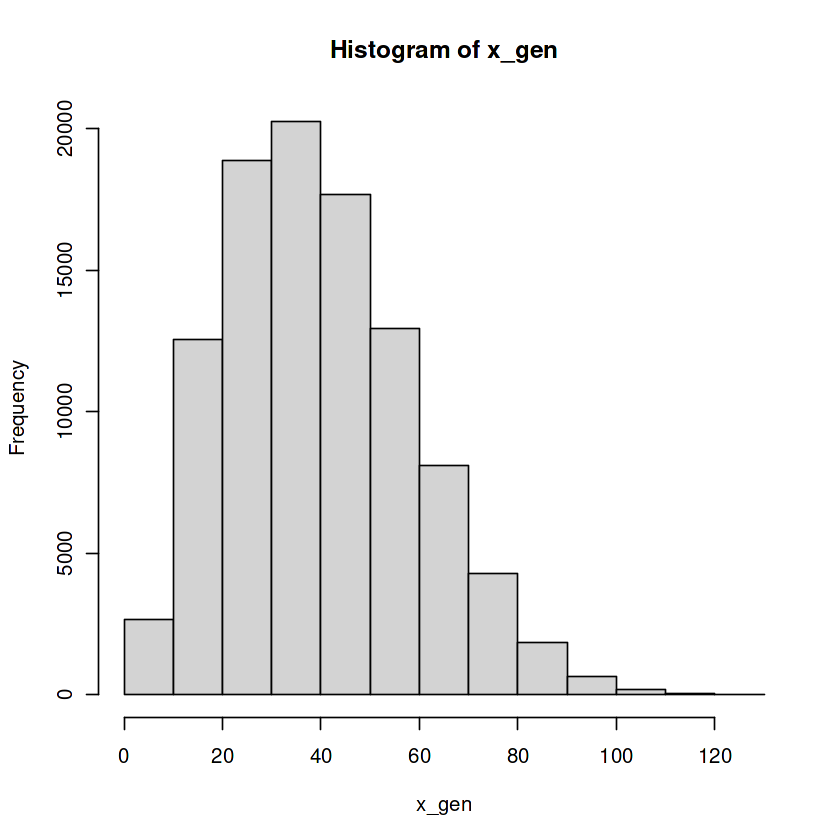

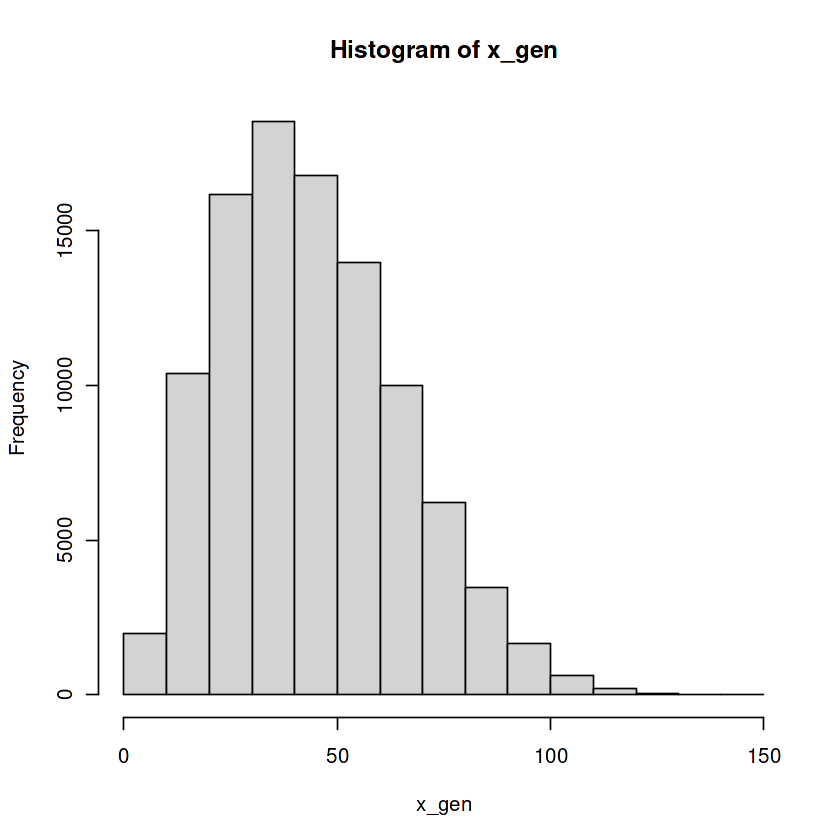

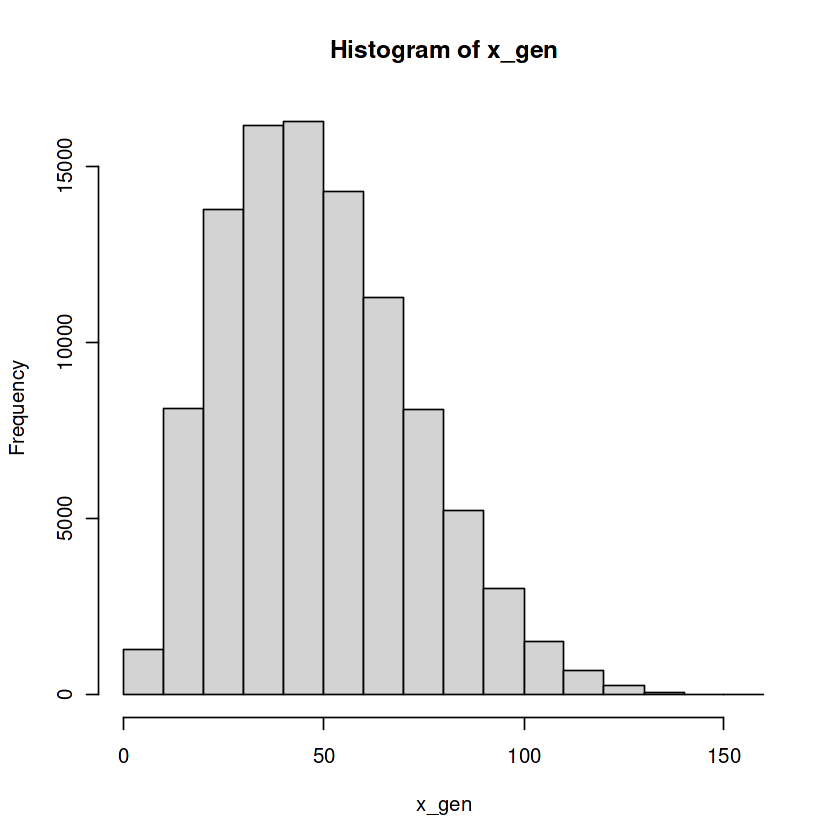

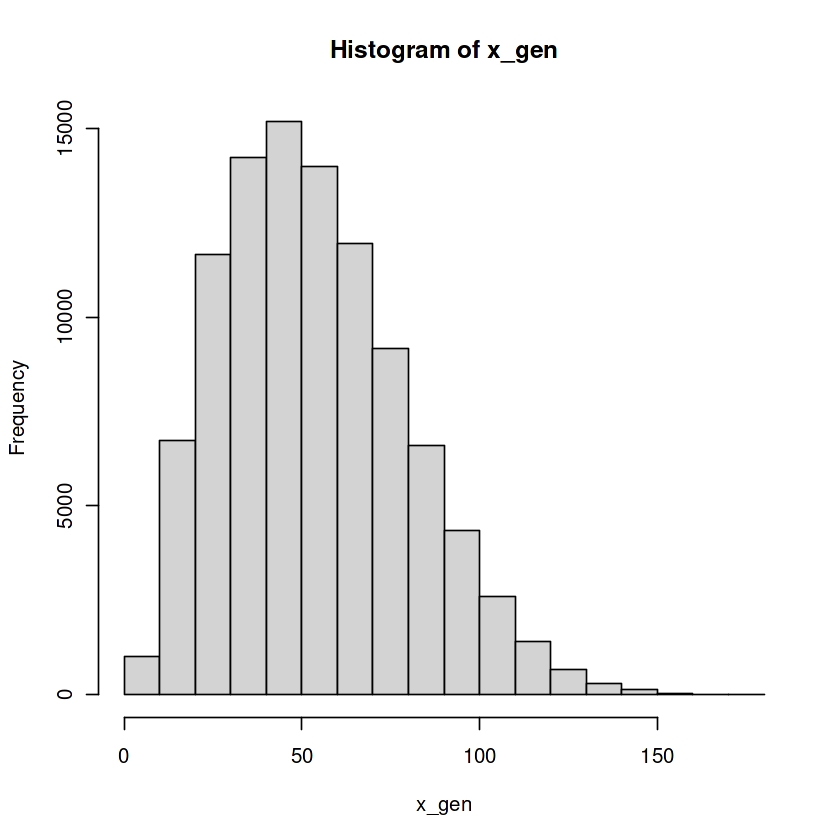

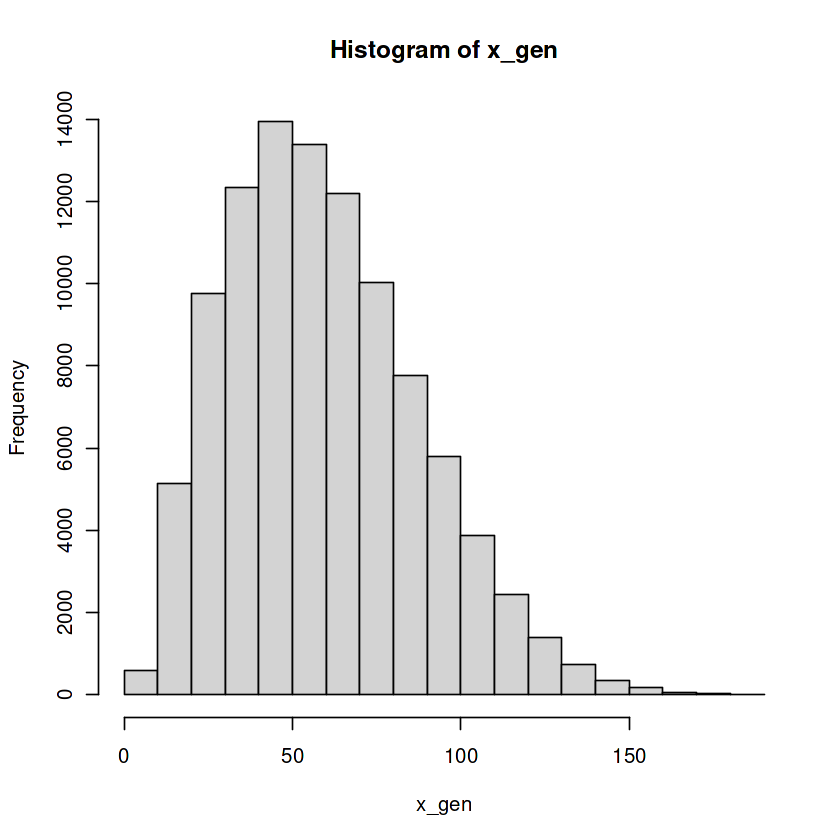

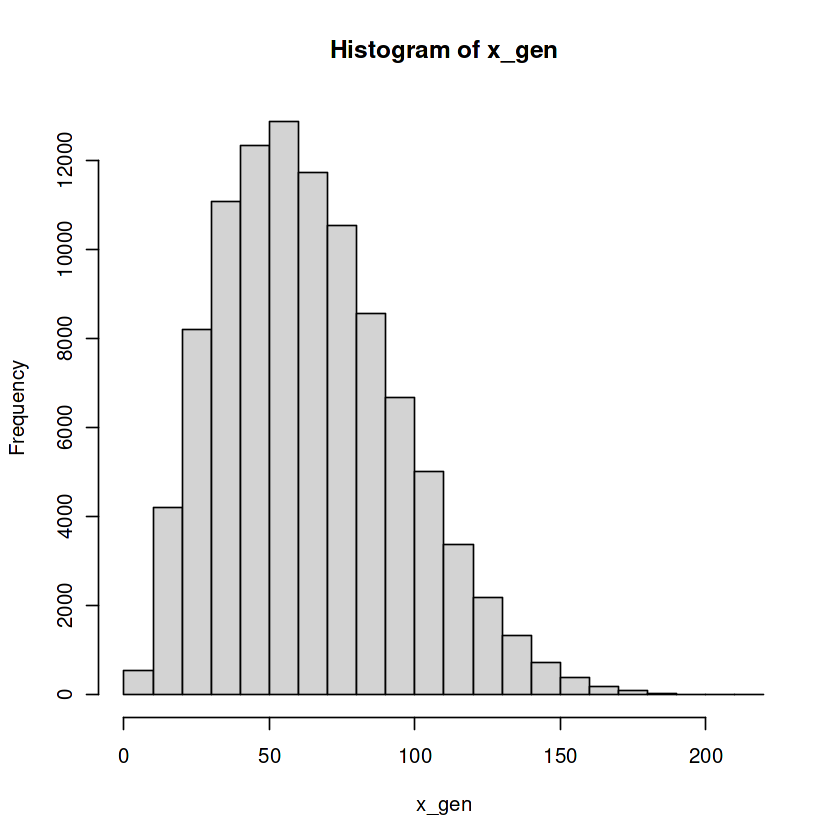

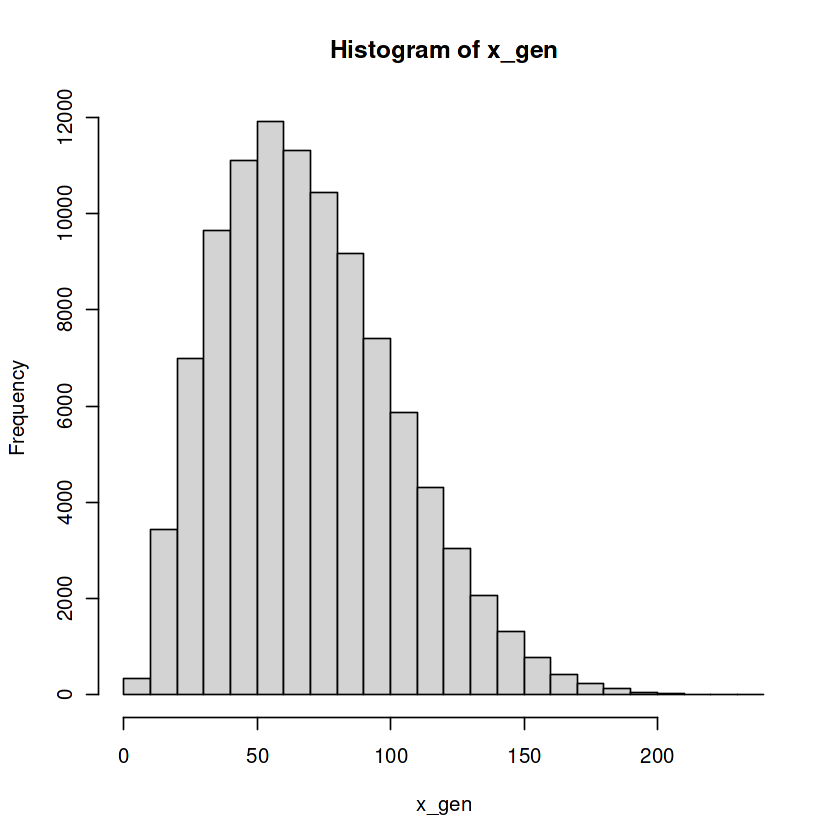

$n4

	Correlation test of fit for the gumbel distribution

data:  sample(x_gen, 250)
R = 1, p-value = 1


$n6

	Correlation test of fit for the gumbel distribution

data:  sample(x_gen, 250)
R = 0.98211, p-value = 0.005743


$n8

	Correlation test of fit for the gumbel distribution

data:  sample(x_gen, 250)
R = 0.98951, p-value = 0.06428


$n10

	Correlation test of fit for the gumbel distribution

data:  sample(x_gen, 250)
R = 0.99501, p-value = 0.4528


$n12

	Correlation test of fit for the gumbel distribution

data:  sample(x_gen, 250)
R = 0.98946, p-value = 0.06299


$n14

	Correlation test of fit for the gumbel distribution

data:  sample(x_gen, 250)
R = 0.98467, p-value = 0.01267


$n16

	Correlation test of fit for the gumbel distribution

data:  sample(x_gen, 250)
R = 0.99146, p-value = 0.1287


$n18

	Correlation test of fit for the gumbel distribution

data:  sample(x_gen, 250)
R = 0.99054, p-value = 0.09264


$n20

	Correlation test of fit for the gumbel distribution

data

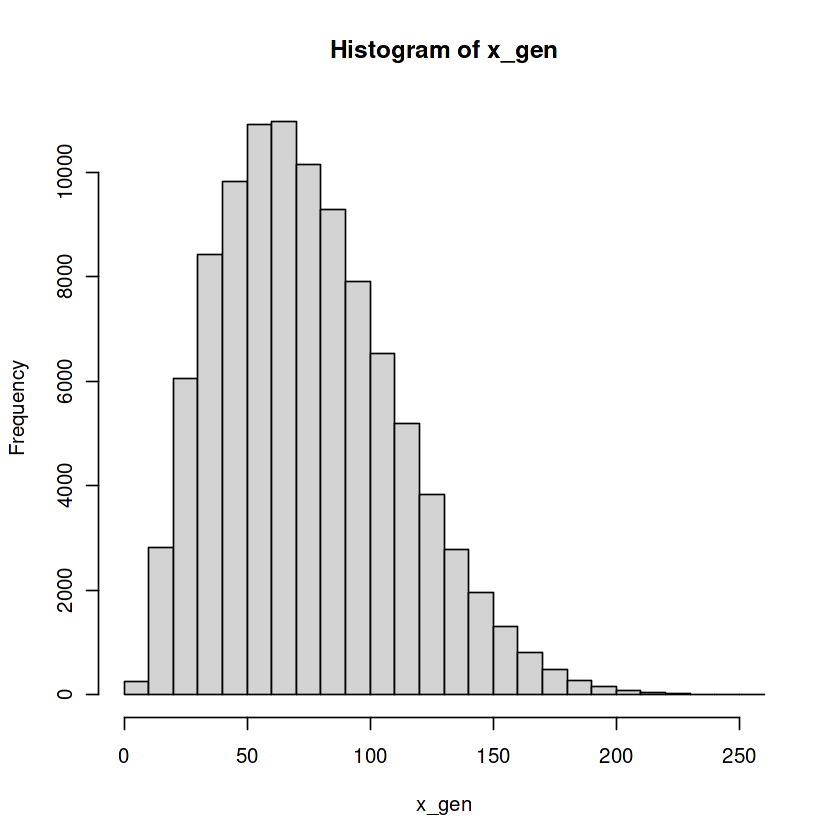

In [4]:
lapply(data_source, gumbel)

# 2. Fit Gumbel distribution

In [5]:
library(data.table)
library(fitdistrplus)
library(VGAM)

Loading required package: splines




Attaching package: ‘VGAM’




The following object is masked _by_ ‘.GlobalEnv’:

    gumbel




The following object is masked from ‘package:sn’:

    zeta




In [6]:
set.seed(42)
data_gen <- lapply(data_source, \(x) sample(length(x):1, 1e5, replace = TRUE, prob = x / sum(x)))

In [7]:
fitgumbel <- lapply(
    data_gen, 
    fitdist, "gumbel", start=list(location=10, scale=10)
)
fitgumbel

Warning message in FUN(X[[i]], ...):
“The pgumbel function should return a zero-length vector when input has length zero”


Warning message in FUN(X[[i]], ...):
“The pgumbel function should return a zero-length vector when input has length zero”


Warning message in FUN(X[[i]], ...):
“The pgumbel function should return a zero-length vector when input has length zero”


Warning message in FUN(X[[i]], ...):
“The pgumbel function should return a zero-length vector when input has length zero”


Warning message in FUN(X[[i]], ...):
“The pgumbel function should return a zero-length vector when input has length zero”


Warning message in FUN(X[[i]], ...):
“The pgumbel function should return a zero-length vector when input has length zero”


Warning message in FUN(X[[i]], ...):
“The pgumbel function should return a zero-length vector when input has length zero”


Warning message in FUN(X[[i]], ...):
“The pgumbel function should return a zero-length vector when input has length zero”


Warning message in FUN(X[[i]], ...):
“The pgumbel function should return a zero-length vector when input has length zero”


Warning message in FUN(X[[i]], ...):
“The pgumbel function should return a zero-length vector when input has length zero”


Warning message in FUN(X[[i]], ...):
“The pgumbel function should return a zero-length vector when input has length zero”


Warning message in FUN(X[[i]], ...):
“The pgumbel function should return a zero-length vector when input has length zero”


Warning message in FUN(X[[i]], ...):
“The pgumbel function should return a zero-length vector when input has length zero”


Warning message in FUN(X[[i]], ...):
“The pgumbel function should return a zero-length vector when input has length zero”


Warning message in FUN(X[[i]], ...):
“The pgumbel function should return a zero-length vector when input has length zero”


Warning message in FUN(X[[i]], ...):
“The pgumbel function should return a zero-length vector when input has length zero”


Warning message in FUN(X[[i]], ...):
“The pgumbel function should return a zero-length vector when input has length zero”


Warning message in FUN(X[[i]], ...):
“The pgumbel function should return a zero-length vector when input has length zero”


Warning message in FUN(X[[i]], ...):
“The pgumbel function should return a zero-length vector when input has length zero”


Warning message in FUN(X[[i]], ...):
“The pgumbel function should return a zero-length vector when input has length zero”


$n4
Fitting of the distribution ' gumbel ' by maximum likelihood 
Parameters:
          estimate  Std. Error
location 1.3235136 0.001842711
scale    0.5550219 0.001492016

$n6
Fitting of the distribution ' gumbel ' by maximum likelihood 
Parameters:
         estimate  Std. Error
location 3.604374 0.005695279
scale    1.698916 0.004013549

$n8
Fitting of the distribution ' gumbel ' by maximum likelihood 
Parameters:
         estimate  Std. Error
location 5.065175 0.007839831
scale    2.346093 0.005719438

$n10
Fitting of the distribution ' gumbel ' by maximum likelihood 
Parameters:
         estimate  Std. Error
location 6.072382 0.010893182
scale    3.261865 0.008002614

$n12
Fitting of the distribution ' gumbel ' by maximum likelihood 
Parameters:
         estimate Std. Error
location 8.291217 0.01383676
scale    4.142913 0.01010362

$n14
Fitting of the distribution ' gumbel ' by maximum likelihood 
Parameters:
          estimate Std. Error
location 10.120163 0.01738638
scale     5.20

In [8]:
gumbel_means <- sapply(fitgumbel, \(x) x[1]$estimate[1])
gumbel_means

gumbel_scales <- sapply(fitgumbel, \(x) x[1]$estimate[2])
gumbel_scales

n4.location  n6.location  n8.location n10.location n12.location n14.location 
    1.323514     3.604374     5.065175     6.072382     8.291217    10.120163 
n16.location n18.location n20.location n22.location n24.location n26.location 
   12.855025    15.279854    18.343409    21.065125    24.613185    27.660704 
n28.location n30.location n32.location n34.location n36.location n38.location 
   31.388369    34.589000    38.604260    42.071388    46.334019    49.966485 
n40.location n42.location 
   54.584985    58.489027

n4.scale   n6.scale   n8.scale  n10.scale  n12.scale  n14.scale  n16.scale 
 0.5550219  1.6989162  2.3460927  3.2618653  4.1429128  5.2041454  6.3871573 
 n18.scale  n20.scale  n22.scale  n24.scale  n26.scale  n28.scale  n30.scale 
 7.7470516  9.1770343 10.8441039 12.3870305 14.0224172 15.7919558 17.6008140 
 n32.scale  n34.scale  n36.scale  n38.scale  n40.scale  n42.scale 
19.4906640 21.4077833 23.5523673 25.4469269 27.6894108 29.8141419

In [9]:
dt <- data.table(n = seq(4, 42, 2), gumbel_means = gumbel_means, gumbel_scales = gumbel_scales)
dt

n,gumbel_means,gumbel_scales
<dbl>,<dbl>,<dbl>
4,1.323514,0.5550219
6,3.604374,1.6989162
8,5.065175,2.3460927
10,6.072382,3.2618653
12,8.291217,4.1429128
14,10.120163,5.2041454
16,12.855025,6.3871573
18,15.279854,7.7470516
20,18.343409,9.1770343


## Linear approximation


Call:
lm(formula = gumbel_means ~ n, data = dt)

Coefficients:
(Intercept)            n  
     -9.432        1.519  


n,gumbel_means
<int>,<dbl>
41,52.86698
42,54.38648
43,55.90597
44,57.42547
45,58.94496
46,60.46446
47,61.98395
48,63.50344
49,65.02294


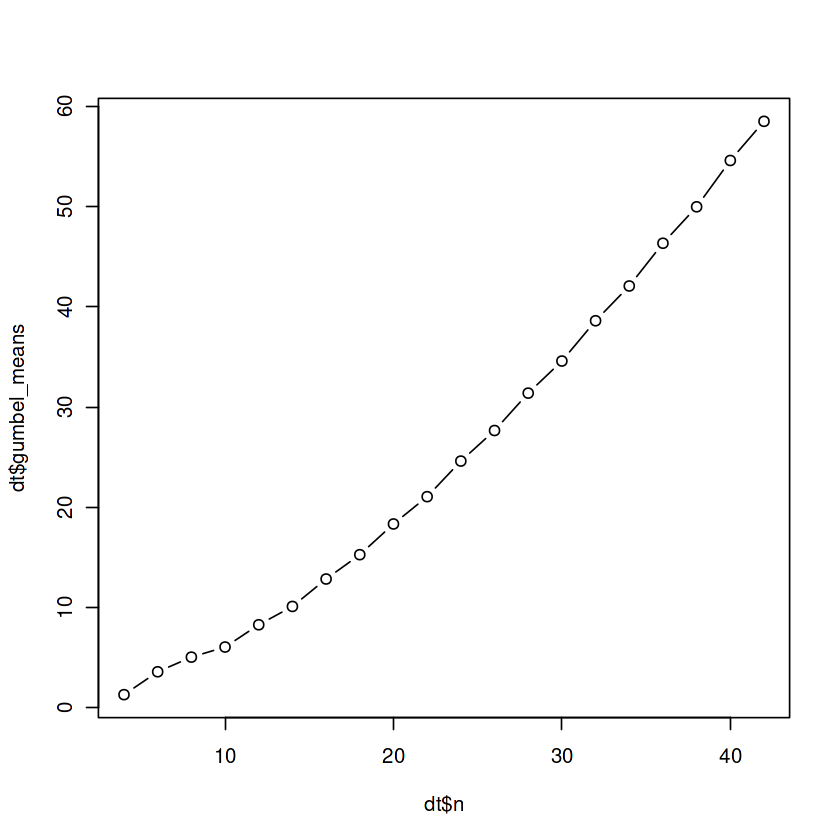

In [10]:
lm(gumbel_means ~ n, dt)
# Prediction for n=41...50
data.table(n = 41:50, gumbel_means = predict(lm(gumbel_means ~ n, dt), data.table(n = 41:50)))
plot(dt$n, dt$gumbel_means, type = "b")


Call:
lm(formula = gumbel_scales ~ n, data = dt)

Coefficients:
(Intercept)            n  
    -4.8952       0.7749  


n,gumbel_scales
<int>,<dbl>
41,26.87732
42,27.65226
43,28.42720
44,29.20214
45,29.97709
46,30.75203
47,31.52697
48,32.30191
49,33.07685


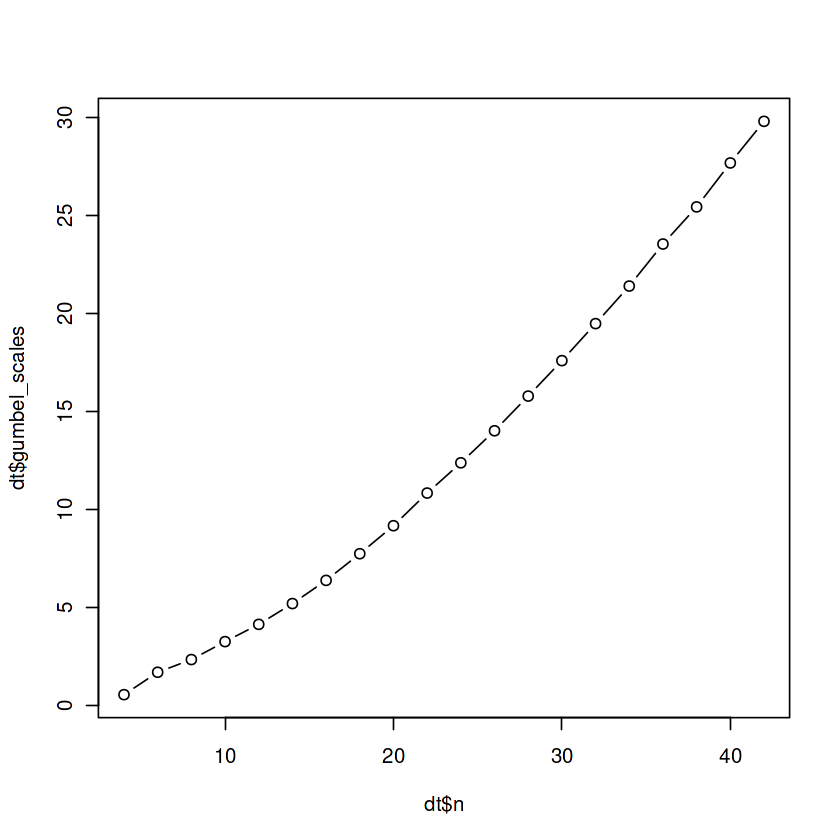

In [11]:
lm(gumbel_scales ~ n, dt)
# Prediction for n=41...50
data.table(n = 41:50, gumbel_scales = predict(lm(gumbel_scales ~ n, dt), data.table(n = 41:50)))
plot(dt$n, dt$gumbel_scales, type = "b")

## Quadratic approximation

In [12]:
lm(gumbel_means ~ poly(n, 2), dt)
# Prediction for n=41...50
data.table(n = 41:50, gumbel_means = predict(lm(gumbel_means ~ poly(n, 2), dt), data.table(n = 41:50)))


Call:
lm(formula = gumbel_means ~ poly(n, 2), data = dt)

Coefficients:
(Intercept)  poly(n, 2)1  poly(n, 2)2  
      25.52        78.37        10.88  


n,gumbel_means
<int>,<dbl>
41,56.78822
42,59.06733
43,61.38749
44,63.74872
45,66.15101
46,68.59435
47,71.07876
48,73.60423
49,76.17075


In [13]:
lm(gumbel_scales ~ poly(n, 2), dt)
# Prediction for n=41...50
data.table(n = 41:50, gumbel_scales = predict(lm(gumbel_scales ~ poly(n, 2), dt), data.table(n = 41:50)))


Call:
lm(formula = gumbel_scales ~ poly(n, 2), data = dt)

Coefficients:
(Intercept)  poly(n, 2)1  poly(n, 2)2  
     12.928       39.968        5.547  


n,gumbel_scales
<int>,<dbl>
41,28.87631
42,30.03849
43,31.22161
44,32.42565
45,33.65062
46,34.89653
47,36.16337
48,37.45114
49,38.75984


## Compare linear and quadratic predictions

In [14]:
data.table(
    n = c(36, 38, 40, 42), 
    gumbel_means = dt[n > 34, gumbel_means],
    gumbel_means_linear_pred = predict(lm(gumbel_means ~ n, dt[n <= 34]), 
                                       data.table(n = c(36, 38, 40, 42))),
    gumbel_means_quadratic_pred = predict(lm(gumbel_means ~ poly(n, 2), dt[n <= 34]), 
                                          data.table(n = c(36, 38, 40, 42))),
    gumbel_scales = dt[n > 34, gumbel_scales],
    gumbel_gumbel_scales_linear_pred = predict(lm(gumbel_scales ~ n, dt[n <= 34]), 
                                               data.table(n = c(36, 38, 40, 42))),
    gumbel_scales_quadratic_pred = predict(lm(gumbel_scales ~ poly(n, 2), dt[n <= 34]), 
                                              data.table(n = c(36, 38, 40, 42)))
)

n,gumbel_means,gumbel_means_linear_pred,gumbel_means_quadratic_pred,gumbel_scales,gumbel_gumbel_scales_linear_pred,gumbel_scales_quadratic_pred
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
36,46.33402,41.99130,46.71889,23.55237,21.31067,23.66774
38,49.96649,44.71860,51.11476,25.44693,22.69968,25.88866
40,54.58498,47.44591,55.69603,27.68941,24.08869,28.20202
42,58.48903,50.17321,60.46269,29.81414,25.47771,30.60781


In [15]:
library(ggplot2)

In [16]:
dt <- data.table(
    n = n <- seq(4, 42, 2),
    d = sapply(data_source, length),
    `n(n-1)/6` = n*(n-1)/6,
    `(n^2)/5` = (n^2)/5
)
dt

n,d,n(n-1)/6,(n^2)/5
<dbl>,<int>,<dbl>,<dbl>
4,3,2.000000,3.2
6,8,5.000000,7.2
8,13,9.333333,12.8
10,19,15.000000,20.0
12,27,22.000000,28.8
14,36,30.333333,39.2
16,47,40.000000,51.2
18,59,51.000000,64.8
20,73,63.333333,80.0


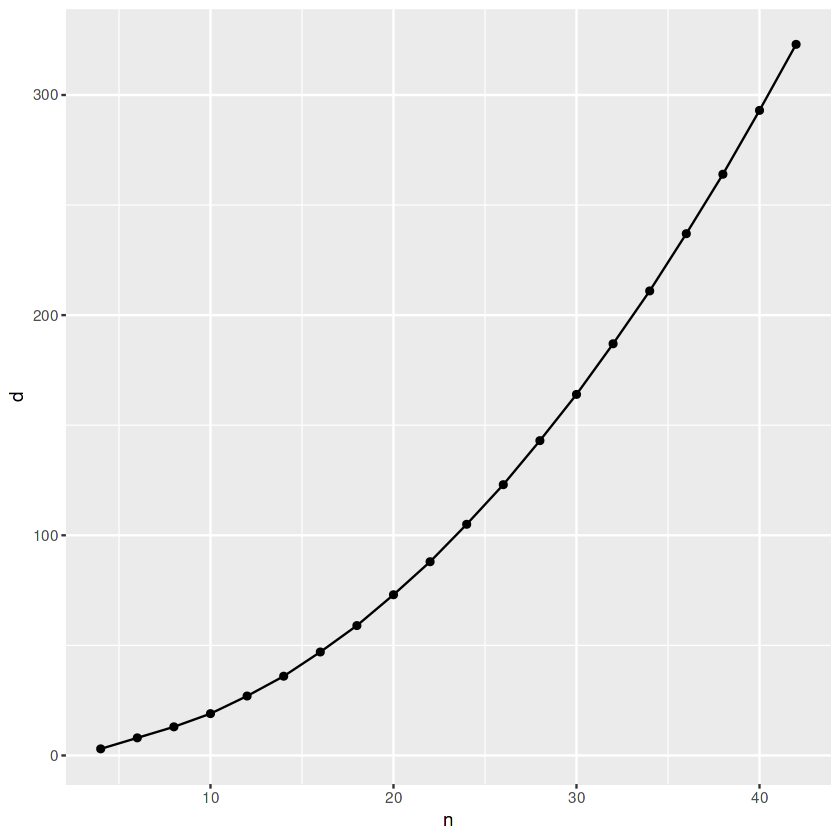

In [17]:
ggplot(dt, aes(n, d)) +
  geom_point() +
  geom_line()

Warning message in melt.data.table(dt, id.vars = "n"):
“'measure.vars' [d, n(n-1)/6, (n^2)/5] are not all of the same type. By order of hierarchy, the molten data value column will be of type 'double'. All measure variables not of type 'double' will be coerced too. Check DETAILS in ?melt.data.table for more on coercion.”


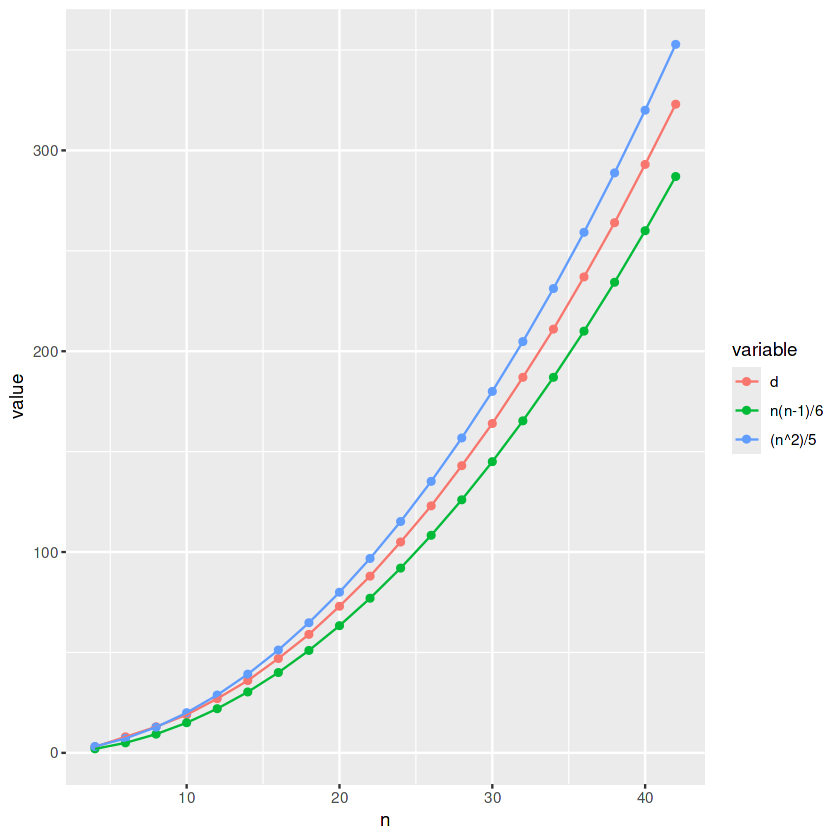

In [18]:
ggplot(melt(dt, id.vars = "n"), aes(n, value, color = variable)) +
  geom_point() +
  geom_line()

In [19]:
dt

n,d,n(n-1)/6,(n^2)/5
<dbl>,<int>,<dbl>,<dbl>
4,3,2.000000,3.2
6,8,5.000000,7.2
8,13,9.333333,12.8
10,19,15.000000,20.0
12,27,22.000000,28.8
14,36,30.333333,39.2
16,47,40.000000,51.2
18,59,51.000000,64.8
20,73,63.333333,80.0


## Fit exponential function

In [20]:
nls_fit <- nls(d ~ b + a*exp(r*n), dt,
               start = list(b = 0, a = 0.1, r = 0.1))
coef(nls_fit)
b <- coef(nls_fit)["b"]
a <- coef(nls_fit)["a"]
r <- coef(nls_fit)["r"]

b            a            r 
-81.53750332  65.96032270   0.04347599

In [21]:
dt[, nls_fit := b + a * exp(r*n)]
dt

n,d,n(n-1)/6,(n^2)/5,nls_fit
<dbl>,<int>,<dbl>,<dbl>,<dbl>
4,3,2.000000,3.2,-3.048594
6,8,5.000000,7.2,4.081676
8,13,9.333333,12.8,11.859689
10,19,15.000000,20.0,20.344291
12,27,22.000000,28.8,29.599670
14,36,30.333333,39.2,39.695847
16,47,40.000000,51.2,50.709205
18,59,51.000000,64.8,62.723063
20,73,63.333333,80.0,75.828312


Warning message in melt.data.table(dt[, .(n, d, nls_fit)], id.vars = "n"):
“'measure.vars' [d, nls_fit] are not all of the same type. By order of hierarchy, the molten data value column will be of type 'double'. All measure variables not of type 'double' will be coerced too. Check DETAILS in ?melt.data.table for more on coercion.”


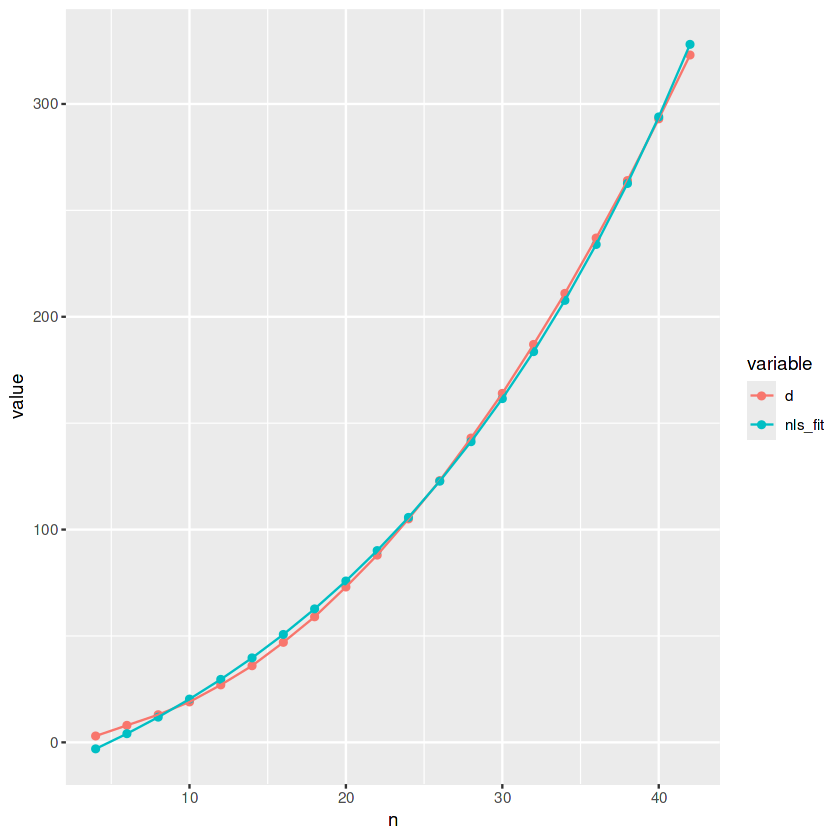

In [22]:
ggplot(melt(dt[, .(n, d, nls_fit)], id.vars = "n"), aes(n, value, color = variable)) +
  geom_point() +
  geom_line()